In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor


invalid escape sequence \*
invalid escape sequence \*
SelectableGroups dict interface is deprecated. Use select.


In [69]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu

# Read recipe inputs
shod_df = dataiku.Dataset("prmb_SDoH_S3")
shod_df = shod_df.get_dataframe()

In [12]:
len(shod_df.columns)

128

In [47]:
shod_df.head()

,zip5,zip4,county,city,Zip_Carrier_Route,Carrier_Route_Type_z4,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,DwellingType_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,Marriage_Code_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Gender_Code_z4,EthnicIQ_v2_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4
0,30002,2,Dekalb,Avondale Est,30002B001,B,67.0,NaN,NaN,Unknown,0,151.0,170.0,1.0,4.0,2.0,1.0,3.0,6.0,4.0,6.0,5.0,3.0,4.0,5.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,5.0,4.0,2.0,4.0,2.0,2.0,1.0,1.0,4.0,5.0,4.0,3.0,1.0,6.0,4.0,2.0,6.0,6125.0,NaN,0,0,17.0,NaN,0,2.0,0.0,0.0,57.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,Single-Known,6.0,1.0,3.0,2.0,1.0,0.0,2.0,7.0,3.0,6.0,1.0,2.0,100.0,0.0,100.0,4.0,6.0,4.0,5.0,3.0,6.0,5.0,3.0,6.0,2.0,48.0,5.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,1.0,4.0,5.0,6.0,4.0,4.0,3.0,2.0,97.0,3.0,0.0,6.0,2.0,1.0,3.0,94.0,Male-Known,Caucasian-Other,0.0,0.0,100.0,0.0,1,1.0
1,30002,5,Dekalb,Avondale Est,30002B001,B,23.0,219.0,50.0,Single,0,151.0,170.0,5.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,4.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,7.0,20157.0,NaN,0,0,78.0,50.0,0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,1.0,1.0,300.0,100.0,4.0,0.0,Married-Inf,3.0,3.0,3.0,3.0,4.0,0.0,3.0,6.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,3.0,6.0,4.0,4.0,4.0,2.0,5.0,4.0,53.0,7.0,4.0,5.0,5.0,1.0,7.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,4.0,5.0,2.0,405.0,6.0,0.0,7.0,4.0,1.0,4.0,55.0,Female-Inf,AA,0.0,0.0,100.0,0.0,3,1.0
2,30002,6,Dekalb,Avondale Est,30002B001,B,NaN,NaN,NaN,Unknown,0,151.0,170.0,4.0,4.0,4.0,1.0,7.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,6.0,5.0,4.0,6.0,3.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,1.0,4.0,3.0,4.0,3.0,6.0,3.0,16749.0,NaN,0,0,63.0,NaN,0,6.0,0.0,100.0,57.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,Single-Known,1.0,3.0,4.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,2.0,100.0,0.0,0.0,5.0,5.0,5.0,7.0,6.0,6.0,6.0,3.0,5.0,3.0,44.0,4.

In [15]:
len(shod_df["Zip_Carrier_Route"].unique())

4306

In [16]:
len(shod_df["zip5"].unique())

159

In [83]:
# Analyze Target Variable

shod_df["SCR_Wellness_z4"].describe()

count    259544.000000
mean         59.713763
std          22.761652
min           1.000000
25%          43.000000
50%          62.000000
75%          79.000000
max          99.000000
Name: SCR_Wellness_z4, dtype: float64

In [88]:
shod_df[shod_df["SCR_Wellness_z4"].notna()].head()

,zip5,zip4,county,city,Zip_Carrier_Route,Carrier_Route_Type_z4,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,DwellingType_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,Marriage_Code_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Gender_Code_z4,EthnicIQ_v2_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4
0,30002,2,Dekalb,Avondale Est,30002B001,B,67.0,NaN,NaN,Unknown,0,151.0,170.0,1.0,4.0,2.0,1.0,3.0,6.0,4.0,6.0,5.0,3.0,4.0,5.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,5.0,4.0,2.0,4.0,2.0,2.0,1.0,1.0,4.0,5.0,4.0,3.0,1.0,6.0,4.0,2.0,6.0,6125.0,NaN,0,0,17.0,NaN,0,2.0,0.0,0.0,57.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,Single-Known,6.0,1.0,3.0,2.0,1.0,0.0,2.0,7.0,3.0,6.0,1.0,2.0,100.0,0.0,100.0,4.0,6.0,4.0,5.0,3.0,6.0,5.0,3.0,6.0,2.0,48.0,5.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,1.0,4.0,5.0,6.0,4.0,4.0,3.0,2.0,97.0,3.0,0.0,6.0,2.0,1.0,3.0,94.0,Male-Known,Caucasian-Other,0.0,0.0,100.0,0.0,1,1.0
1,30002,5,Dekalb,Avondale Est,30002B001,B,23.0,219.0,50.0,Single,0,151.0,170.0,5.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,4.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,7.0,20157.0,NaN,0,0,78.0,50.0,0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,1.0,1.0,300.0,100.0,4.0,0.0,Married-Inf,3.0,3.0,3.0,3.0,4.0,0.0,3.0,6.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,3.0,6.0,4.0,4.0,4.0,2.0,5.0,4.0,53.0,7.0,4.0,5.0,5.0,1.0,7.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,4.0,5.0,2.0,405.0,6.0,0.0,7.0,4.0,1.0,4.0,55.0,Female-Inf,AA,0.0,0.0,100.0,0.0,3,1.0
2,30002,6,Dekalb,Avondale Est,30002B001,B,NaN,NaN,NaN,Unknown,0,151.0,170.0,4.0,4.0,4.0,1.0,7.0,6.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,6.0,5.0,4.0,6.0,3.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,1.0,4.0,3.0,4.0,3.0,6.0,3.0,16749.0,NaN,0,0,63.0,NaN,0,6.0,0.0,100.0,57.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,Single-Known,1.0,3.0,4.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,2.0,100.0,0.0,0.0,5.0,5.0,5.0,7.0,6.0,6.0,6.0,3.0,5.0,3.0,44.0,4.

In [21]:
shod_df.groupby(['county','zip5'])['zip4'].describe()

count         mean          std     min      25%     50%      75%     max
county   zip5                                                                             
Cobb     30006    76.0    41.197368    29.469089     1.0    20.75    39.5    58.25   212.0
         30007   177.0  1616.152542   895.332280    11.0   876.00  1611.0  2408.00  3231.0
         30008  1847.0  5136.882512  1755.610920     1.0  3768.50  4711.0  6050.50  9109.0
         30060  2834.0  4576.041284  2262.723790     1.0  2331.25  4814.5  6357.75  9999.0
         30061   636.0  2065.339623  1694.241879     6.0   623.75  1449.5  3473.50  7010.0
         30062  4620.0  4414.494589  2166.474391     1.0  2561.75  4452.5  6004.25  9913.0
         30063     1.0     1.000000          NaN     1.0     1.00     1.0     1.00     1.0
         30064  3464.0  3398.137413  1548.724579     2.0  2092.75  3256.5  4479.25  9921.0
         30065   208.0  1160.812500   712.013019     1.0   553.50  1172.5  1737.50  2525.0
         30066  4300.0  3973.480930  1976.042220     1.0  2353.50  3831.5  5448.50  8808.0
         30067  3290.0  5804.038906  1862.589147  1203.0  4531.25  5652.5  7265.50  9699.0
         30068  2568.0  3293.136682  1252.962397     1.0  2404.75  3301.5  4216.25  6300.0
         30069     1.0  4703.000000          NaN  4703.0  4703.00  4703.0  4703.00  4703.0
         30080  3686.0  4882.431362  2453.787487     3.0  2646.25  4530.5  6960.50  9999.0
         30081   554.0  2595.456679  2864.175703     1.0   614.25  1685.0  2693.75  8833.0
         30082  1996.0  3598.899299  1214.883059  1501.0  2644.75  3517.5  4426.25  7321.0
         30090     2.0  3558.000000  4869.137295   115.0  1836.50  3558.0  5279.50  7001.0
         30101  4677.0  5436.377379  2389.652127     3.0  3764.00  5527.0  7621.00  9999.0
         30106  1647.0  3194.064359  2207.467768     5.0  1643.00  2653.0  3439.00  8541.0
         30111   143.0   382.951049   367.416146     2.0   123.00   333.0   578.00  2302.0
         30126  3158.0  3439.350538  1907.560148     2.0  1826.25  3141.5  4936.75  9999.0
         30127  5065.0  4362.386969  2397.224860     2.0  2237.00  4178.0  6211.00  9529.0
         30144  3050.0  3960.498033  2137.930379     1.0  1975.50  3189.5  5858.75  9999.0
         30152  2570.0  4879.632685  1790.917881     1.0  3383.25  4549.5  6449.75  8299.0
         30156   388.0  3849.123711  4023.711403     5.0   395.50   820.5  8405.00  9202.0
         30160    29.0  9515.000000     8.514693  9501.0  9508.00  9515.0  9522.00  9529.0
         30168  1622.0  5635.543773  1490.020755     7.0  4849.25  5721.5  6806.75  9999.0
         30339  2429.0  4247.626184  1888.074672     4.0  2943.00  4070.0  5362.00  9905.0
Dekalb   30002   687.0  1110.010189   547.050492     2.0   593.50  1288.0  1535.50  1791.0
         30021  1629.0  2292.709638  1540.115962     1.0  1340.00  2042.0  2841.00  9999.0
         30030  2319.0  3202.383786  1245.937896  1000.0  2026.50  3272.0  4191.50  6900.0
         30031   671.0  1961.536513  1148.926856     3.0   983.50  2049.0  2876.00  4260.0
         30032  3286.0  4490.727328  1743.868157  1000.0  3104.25  4605.5  5916.75  9902.0
         30033  2272.0  3631.484155  1771.445973     8.0  2103.75  3529.5  5116.25  8801.0
         30034  3146.0  4126.516847  1818.196081  1000.0  2534.25  4104.5  5532.75  9997.0
         30035  1347.0  2689.056422  1070.603265  1001.0  1828.50  2533.0  3589.50  7703.0
         30036   555.0  1220.300901   670.541019     3.0   633.50  1334.0  1803.50  2274.0
         30037   373.0  1681.825737  1237.398454     1.0   495.00  1620.0  2797.00  5252.0
         30038  3072.0  3534.943685  1702.147343  1100.0  2246.75  3329.5  4527.25  7746.0
         30058  3646.0  5192.350521  2248.435373    14.0  3566.25  5352.0  6727.75  9999.0
         30072   553.0   909.846293   583.085471     2.0   398.00   838.0  1468.00  2802.0
         30074   335.0   698.002985   443.564309     2.0   335.50   661.0  1114.50  1519.0
         3007

In [51]:
# Split model for AA & White
# Debt biggest problem - Technology solution

### Prediction on Entire Female Population

In [94]:
# Restricting the population to Female & Age between 18 to 50
# We are also restricting minor 

shod_filtered_df = shod_df[shod_df["Gender_Code_z4"].isin(["Female-Inf","Female-Known"])].copy()
shod_filtered_df_1 = shod_filtered_df[shod_filtered_df["Age_z4"].between(18, 50)]                           
shod_filtered_df_2 = shod_filtered_df_1[(~shod_filtered_df_1["EthnicIQ_v2_z4"].isin(["Other", "Unknown","Hispanic"]))]
shod_filtered_df = shod_filtered_df_2[ (shod_filtered_df_2["SCR_Wellness_z4"].notna()) 
                                & (shod_filtered_df_2["EthnicIQ_v2_z4"].notna()) ]     


In [95]:
shod_filtered_df.count()

zip5                              51677
zip4                              51677
county                            51677
city                              51677
Zip_Carrier_Route                 51677
Carrier_Route_Type_z4             51677
Home_Age_z4                       40039
HomeValueIQ_z4                    39464
HomeValueIQ_Equity_z4             39464
DwellingType_z4                   51677
Homeowner_Pct_z4                  51677
Affordability_Index_scf_z4        51677
Affordability_Index_z4            51676
Premover_v2_z4                    51677
Auto_Age_z4                       51677
Auto_Avg_Mileage_z4               51677
Number_of_Autos_z4                51677
InMarket_Aldi_z4                  51677
InMarket_BiLo_WinnDixie_z4        51677
InMarket_Costco_z4                51677
InMarket_H_E_B_z4                 51677
InMarket_Kroger_z4                51677
InMarket_Meijer_z4                51677
InMarket_Publix_z4                51677
InMarket_Safeway_z4               51677


In [96]:
shod_df["EthnicIQ_v2_z4"].unique()

array(['Caucasian-Other', 'AA', 'Hispanic', 'Unknown', 'Caucasian-Jewish',
       'Middle Eastern', 'Asian-Other', 'Asian-Chinese', 'Asian-Indian',
       'Other', 'Native Amer/Pac Island', nan], dtype=object)

In [97]:
shod_temp_df.head()

,zip5,zip4,county,city,Zip_Carrier_Route,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4,Carrier_Route_Type_z4_B,Carrier_Route_Type_z4_C,Carrier_Route_Type_z4_G,Carrier_Route_Type_z4_H,Carrier_Route_Type_z4_R,DwellingType_z4_Multiple,DwellingType_z4_Single,DwellingType_z4_Unknown,Marriage_Code_z4_Married-Inf,Marriage_Code_z4_Married-Known,Marriage_Code_z4_Single-Inf,Marriage_Code_z4_Single-Known,Marriage_Code_z4_Unknown,Gender_Code_z4_Female-Inf,Gender_Code_z4_Female-Known,EthnicIQ_v2_z4_AA,EthnicIQ_v2_z4_Asian-Chinese,EthnicIQ_v2_z4_Asian-Indian,EthnicIQ_v2_z4_Asian-Other,EthnicIQ_v2_z4_Caucasian-Jewish,EthnicIQ_v2_z4_Caucasian-Other,EthnicIQ_v2_z4_Hispanic,EthnicIQ_v2_z4_Middle Eastern,EthnicIQ_v2_z4_Native Amer/Pac Island,EthnicIQ_v2_z4_Other,EthnicIQ_v2_z4_Unknown
1,30002,5,Dekalb,Avondale Est,30002B001,23.0,219.0,50.0,0,151.0,170.0,5.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,4.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,7.0,20157.0,NaN,0,0,78.0,50.0,0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,1.0,1.0,300.0,100.0,4.0,0.0,3.0,3.0,3.0,3.0,4.0,0.0,3.0,6.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,3.0,6.0,4.0,4.0,4.0,2.0,5.0,4.0,53.0,7.0,4.0,5.0,5.0,1.0,7.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,4.0,5.0,2.0,405.0,6.0,0.0,7.0,4.0,1.0,4.0,55.0,0.0,0.0,100.0,0.0,3,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,30002,9,Dekalb,Avondale Est,30002B001,NaN,310.0,310.0,100,151.0,170.0,1.0,5.0,2.0,1.0,4.0,6.0,5.0,5.0,2.0,4.0,5.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,6.0,2.0,2.0,3.0,6.0,4.0,5.0,3.0,6.0,5.0,18664.0,NaN,0,0,79.0,310.0,0,3.0,0.0,0.0,62.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,3.0,3.0,3.0,3.0,3.0,0.0,4.0,5.0,2.0,6.0,3.0,2.0,0.0,0.0,0.0,3.0,4.0,2.0,4.0,5

In [99]:
shod_temp_df = shod_filtered_df

In [100]:
# Categorical Encoding 

categorical_columns = ["Carrier_Route_Type_z4", "DwellingType_z4", "Marriage_Code_z4", "EthnicIQ_v2_z4"]

for column in categorical_columns:
    tempdf = pd.get_dummies(shod_temp_df[column], prefix=column)
    shod_temp_df = pd.merge(
        left=shod_temp_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    shod_temp_df = shod_temp_df.drop(columns=column)



In [8]:
shod_temp_df.head()

,zip5,zip4,county,city,Zip_Carrier_Route,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4,Carrier_Route_Type_z4_B,Carrier_Route_Type_z4_C,Carrier_Route_Type_z4_G,Carrier_Route_Type_z4_H,Carrier_Route_Type_z4_R,DwellingType_z4_Multiple,DwellingType_z4_Single,DwellingType_z4_Unknown,Marriage_Code_z4_Married-Inf,Marriage_Code_z4_Married-Known,Marriage_Code_z4_Single-Inf,Marriage_Code_z4_Single-Known,Marriage_Code_z4_Unknown,Gender_Code_z4_Female-Inf,Gender_Code_z4_Female-Known,EthnicIQ_v2_z4_AA,EthnicIQ_v2_z4_Asian-Chinese,EthnicIQ_v2_z4_Asian-Indian,EthnicIQ_v2_z4_Asian-Other,EthnicIQ_v2_z4_Caucasian-Jewish,EthnicIQ_v2_z4_Caucasian-Other,EthnicIQ_v2_z4_Hispanic,EthnicIQ_v2_z4_Middle Eastern,EthnicIQ_v2_z4_Native Amer/Pac Island,EthnicIQ_v2_z4_Other,EthnicIQ_v2_z4_Unknown
1,30002,5,Dekalb,Avondale Est,30002B001,23.0,219.0,50.0,0,151.0,170.0,5.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,4.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,7.0,20157.0,NaN,0,0,78.0,50.0,0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,1.0,1.0,300.0,100.0,4.0,0.0,3.0,3.0,3.0,3.0,4.0,0.0,3.0,6.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,3.0,6.0,4.0,4.0,4.0,2.0,5.0,4.0,53.0,7.0,4.0,5.0,5.0,1.0,7.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,4.0,5.0,2.0,405.0,6.0,0.0,7.0,4.0,1.0,4.0,55.0,0.0,0.0,100.0,0.0,3,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,30002,9,Dekalb,Avondale Est,30002B001,NaN,310.0,310.0,100,151.0,170.0,1.0,5.0,2.0,1.0,4.0,6.0,5.0,5.0,2.0,4.0,5.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,6.0,2.0,2.0,3.0,6.0,4.0,5.0,3.0,6.0,5.0,18664.0,NaN,0,0,79.0,310.0,0,3.0,0.0,0.0,62.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,3.0,3.0,3.0,3.0,3.0,0.0,4.0,5.0,2.0,6.0,3.0,2.0,0.0,0.0,0.0,3.0,4.0,2.0,4.0,5

In [101]:
shod_final_df = shod_temp_df.drop(["zip5", "zip4", "county", "city", "Zip_Carrier_Route","Gender_Code_z4"], axis=1)

In [102]:
X = shod_final_df.drop([ "SCR_Wellness_z4"],axis=1)
y = shod_final_df["SCR_Wellness_z4"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


In [104]:
xgb = XGBRegressor(n_estimators=100)
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [105]:
X_train.head()

,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4,Carrier_Route_Type_z4_B,Carrier_Route_Type_z4_C,Carrier_Route_Type_z4_G,Carrier_Route_Type_z4_H,Carrier_Route_Type_z4_R,DwellingType_z4_Multiple,DwellingType_z4_Single,DwellingType_z4_Unknown,Marriage_Code_z4_Married-Inf,Marriage_Code_z4_Married-Known,Marriage_Code_z4_Single-Inf,Marriage_Code_z4_Single-Known,Marriage_Code_z4_Unknown,EthnicIQ_v2_z4_AA,EthnicIQ_v2_z4_Asian-Chinese,EthnicIQ_v2_z4_Asian-Indian,EthnicIQ_v2_z4_Asian-Other,EthnicIQ_v2_z4_Caucasian-Jewish,EthnicIQ_v2_z4_Caucasian-Other,EthnicIQ_v2_z4_Middle Eastern,EthnicIQ_v2_z4_Native Amer/Pac Island
169114,16.0,381.0,213.0,82,157.0,152.0,4.0,3.0,6.0,1.0,4.0,6.0,6.0,5.0,6.0,6.0,5.0,3.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,3.0,5.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,2.0,3.0,4.0,2.0,6.0,5.0,2.0,19598.0,29.0,0,0,97.0,242.0,6,5.0,74.0,67.0,41.0,1.0,1.0,1.0,1.0,1.0,165.0,147.0,3.0,4.0,3.0,2.0,1.0,2.0,4.0,0.0,6.0,4.0,6.0,3.0,5.0,4.0,89.0,70.0,0.0,5.0,5.0,5.0,5.0,6.0,4.0,6.0,5.0,6.0,5.0,6.0,2.0,5.0,6.0,3.0,6.0,2.0,3.0,6.0,5.0,6.0,6.0,3.0,6.0,3.0,3.0,428.0,6.0,44.0,4.0,5.0,5.0,4.0,47.0,52.0,11.0,37.0,0.0,34,19.0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
40917,NaN,NaN,NaN,33,151.0,143.0,6.0,1.0,2.0,0.0,6.0,6.0,3.0,4.0,7.0,4.0,6.0,4.0,4.0,5.0,3.0,7.0,6.0,4.0,5.0,1.0,2.0,6.0,3.0,7.0,2.0,1.0,5.0,3.0,5.0,2.0,2.0,1.0,1.0,7.0,7.0,4.0,2675.0,4.0,0,0,20.0,4.0,0,4.0,100.0,100.0,3.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,100.0,2.0,2.0,3.0,3.0,6.0,0.0,7.0,4.0,6.0,2.0,7.0,5.0,100.0,0.0,0.0,4.0,5.0,5.0,7.0,4.0,5.0,7.0,7.0,7.0,5.0,5.0,1.0,3.0,2.0,1.0,3.0,1.0,2.0,5.0,7.0,7.0,7.0,1.0,3.0,6.0,2.0,38.0,2.0,0.0,2.0,7.0,4.0,7.0,24.0,0.0,0.0,100.0,0.0,3,3.0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
44402,17.0,195.0,64.0,71,151.0,152.0,4.0,2.0,5.0,1.0,6.0,6.0,5

In [14]:
y_train.head()

75779     56.0
231268    23.0
58516     67.0
96578     11.0
250416    55.0
Name: SCR_Wellness_z4, dtype: float64

In [15]:
# xgb.feature_importances_

In [106]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

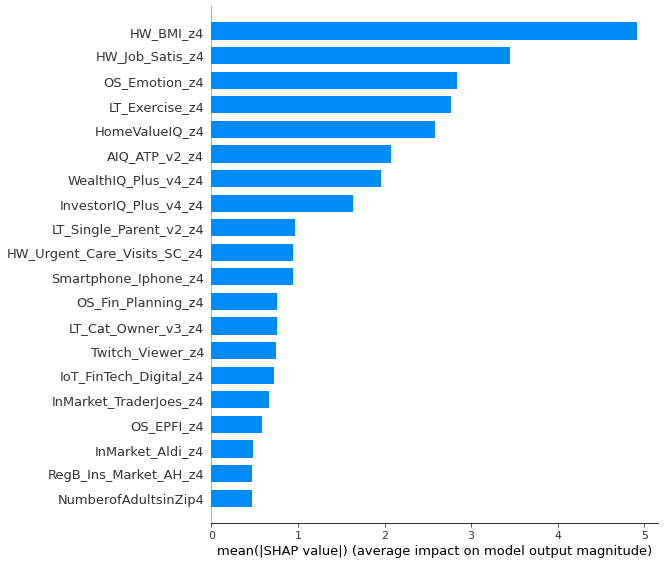

In [107]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

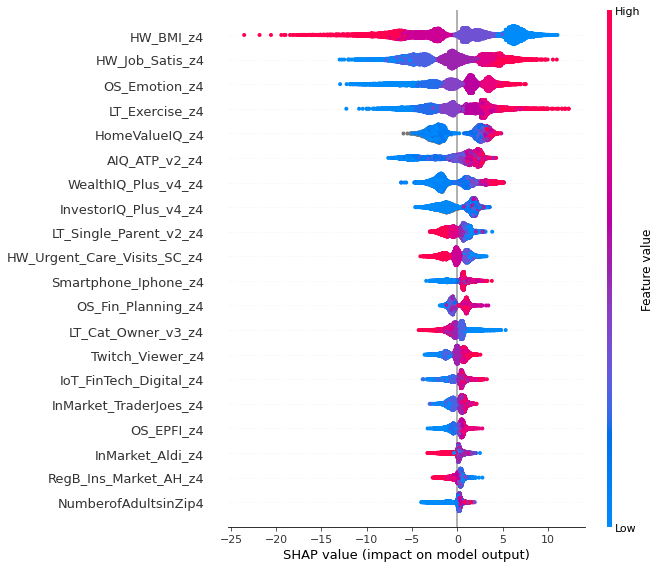

In [108]:
shap.summary_plot(shap_values, X_test)

In [ ]:
20 features - 120


y(T) = mx(F) + c
m = coeff


AA & Everybody ()






Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


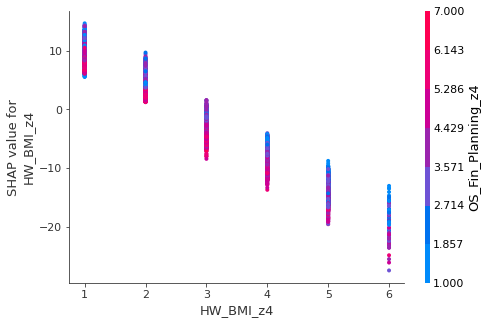

In [19]:
shap.dependence_plot("HW_BMI_z4", shap_values, X_test)

### Prediction on AA Population 

In [20]:
shod_final_df.head()

,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4,Carrier_Route_Type_z4_B,Carrier_Route_Type_z4_C,Carrier_Route_Type_z4_G,Carrier_Route_Type_z4_H,Carrier_Route_Type_z4_R,DwellingType_z4_Multiple,DwellingType_z4_Single,DwellingType_z4_Unknown,Marriage_Code_z4_Married-Inf,Marriage_Code_z4_Married-Known,Marriage_Code_z4_Single-Inf,Marriage_Code_z4_Single-Known,Marriage_Code_z4_Unknown,Gender_Code_z4_Female-Inf,Gender_Code_z4_Female-Known,EthnicIQ_v2_z4_AA,EthnicIQ_v2_z4_Asian-Chinese,EthnicIQ_v2_z4_Asian-Indian,EthnicIQ_v2_z4_Asian-Other,EthnicIQ_v2_z4_Caucasian-Jewish,EthnicIQ_v2_z4_Caucasian-Other,EthnicIQ_v2_z4_Hispanic,EthnicIQ_v2_z4_Middle Eastern,EthnicIQ_v2_z4_Native Amer/Pac Island,EthnicIQ_v2_z4_Other,EthnicIQ_v2_z4_Unknown
1,23.0,219.0,50.0,0,151.0,170.0,5.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,4.0,3.0,4.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,5.0,5.0,4.0,3.0,4.0,5.0,6.0,4.0,5.0,3.0,3.0,7.0,20157.0,NaN,0,0,78.0,50.0,0,3.0,0.0,0.0,48.0,1.0,1.0,1.0,1.0,1.0,300.0,100.0,4.0,0.0,3.0,3.0,3.0,3.0,4.0,0.0,3.0,6.0,4.0,6.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,3.0,6.0,4.0,4.0,4.0,2.0,5.0,4.0,53.0,7.0,4.0,5.0,5.0,1.0,7.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,4.0,5.0,2.0,405.0,6.0,0.0,7.0,4.0,1.0,4.0,55.0,0.0,0.0,100.0,0.0,3,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,NaN,310.0,310.0,100,151.0,170.0,1.0,5.0,2.0,1.0,4.0,6.0,5.0,5.0,2.0,4.0,5.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,6.0,2.0,2.0,3.0,6.0,4.0,5.0,3.0,6.0,5.0,18664.0,NaN,0,0,79.0,310.0,0,3.0,0.0,0.0,62.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,3.0,3.0,3.0,3.0,3.0,0.0,4.0,5.0,2.0,6.0,3.0,2.0,0.0,0.0,0.0,3.0,4.0,2.0,4.0,5.0,2.0,4.0,5.0,1.0,2.0,65.0,4.0,5.0,5.0,4.0,4.0,3.0,1.0,4.0,3.0,6.0,5.0,5.0,6.0,3.0,6.0,5.0,375.0,5.0,0.0,5.0,3.0,4.

In [113]:
shod_temp_aa_df = shod_filtered_df[shod_filtered_df["EthnicIQ_v2_z4"] == 'AA'].copy()

In [114]:

categorical_columns = ["Carrier_Route_Type_z4", "DwellingType_z4", "Marriage_Code_z4", "EthnicIQ_v2_z4"]

for column in categorical_columns:
    tempdf = pd.get_dummies(shod_temp_aa_df[column], prefix=column)
    shod_temp_aa_df = pd.merge(
        left=shod_temp_aa_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    shod_temp_aa_df = shod_temp_aa_df.drop(columns=column)



In [115]:
shod_temp_aa_df.head()

,zip5,zip4,county,city,Zip_Carrier_Route,Home_Age_z4,HomeValueIQ_z4,HomeValueIQ_Equity_z4,Homeowner_Pct_z4,Affordability_Index_scf_z4,Affordability_Index_z4,Premover_v2_z4,Auto_Age_z4,Auto_Avg_Mileage_z4,Number_of_Autos_z4,InMarket_Aldi_z4,InMarket_BiLo_WinnDixie_z4,InMarket_Costco_z4,InMarket_H_E_B_z4,InMarket_Kroger_z4,InMarket_Meijer_z4,InMarket_Publix_z4,InMarket_Safeway_z4,InMarket_SamsClub_z4,InMarket_Sprouts_z4,InMarket_TraderJoes_z4,InMarket_Whole_Foods_z4,LT_Food_Delivery_Service_v2_z4,Grocery_Farmers_Mkt_z4,Grocery_Organic_z4,Grocery_Trips_z4,HW_BMI_z4,HW_Diet_z4,Diet_CageFree_Eggs_z4,Diet_Fake_Meat_Alt_z4,Diet_FreeRange_Chicken_z4,Diet_GrassFed_Beef_z4,Diet_Vegetarian_z4,HW_Junk_Diet_z4,OS_RiskTaking_Fin_z4,HW_Job_Satis_z4,OS_EPFI_z4,OS_Fin_Planning_z4,OS_Fin_IMPControl_z4,OS_Fin_IMP_z4,OS_Fin_Motivation_z4,OS_Fin_Organization_z4,Spendex_Plus_v2_z4,InvestorIQ_Plus_v4_z4,Invest_Active_z4,Invest_Real_Estate_z4,IncomeIQ_Plus_v3_z4,WealthIQ_Plus_v4_z4,Investments_z4,AIQ_Employment_z4,Job_Seeker_z4,Job_Seeker_Active_z4,AIQ_ATP_v2_z4,HS_Assimilation_z4,HS_Bilingual_z4,HS_First_Generation_z4,HS_Primary_Lang_Spanish_z4,HS_Second_Generation_z4,NumberOfAdults_z4,NumberOfChildren_z4,PersonsatResidence_z4,Cohabitate_z4,LT_Grand_Parent_z4,LT_Dog_Owner_v3_z4,LT_Cat_Owner_v3_z4,LT_Pet_Owner_v3_z4,LT_Other_Pet_Owner_v3_z4,HS_Generations_in_Home_z4,LT_Single_Parent_v2_z4,LT_Senior_Adult_in_HH_v2_z4,OS_Innovator_z4,OS_Laggard_z4,YouTube_Creator_z4,Twitch_Viewer_z4,Smartphone_Android_z4,Smartphone_Iphone_z4,Smartphone_None_z4,IoT_FinTech_Digital_z4,RegB_FinTech_Digital_z4,LT_High_Tech_Leader_v2_z4,OS_RiskTaking_Health_z4,HW_Alcohol_v2_z4,HW_Smoking_Cigars_SC_z4,HW_Smoking_Hookah_SC_z4,HW_Smoking_z4,HW_ER_Visits_SC_z4,HW_Urgent_Care_Visits_SC_z4,SCR_Wellness_z4,OS_Emotion_z4,InMarket_LTC_Ins_z4,Ins_ADaD_z4,Ins_Dental_z4,Ins_Homeowners_z4,Ins_Life_z4,Ins_Renters_z4,Ins_Supplemental_z4,Ins_Vision_z4,RegB_Ins_Auto_IM_z4,RegB_Ins_Health_IM_z4,RegB_Ins_Life_IM_z4,HW_Primary_Care_Doctor_SC_z4,RegB_Ins_Employer_AH_z4,RegB_Ins_Market_AH_z4,RegB_Ins_Medicare_AH_z4,Spendex_PERS_INS_v2_z4,HW_Med_Spec_Visits_SC_z4,HW_Med_Utilization_z4,HW_Sleep_v3_z4,HW_Stress_v2_z4,LT_Exercise_z4,HW_Telemedicine_SC_z4,Age_z4,Gender_Code_z4,Education_Coll_v2_z4,Education_Grad_v2_z4,Education_HS_v2_z4,Education_LTHS_v2_z4,NumberofAdultsinZip4,NumberHouseholdsInZip4,Carrier_Route_Type_z4_B,Carrier_Route_Type_z4_C,Carrier_Route_Type_z4_G,Carrier_Route_Type_z4_H,Carrier_Route_Type_z4_R,DwellingType_z4_Multiple,DwellingType_z4_Single,DwellingType_z4_Unknown,Marriage_Code_z4_Married-Inf,Marriage_Code_z4_Married-Known,Marriage_Code_z4_Single-Inf,Marriage_Code_z4_Single-Known,Marriage_Code_z4_Unknown,EthnicIQ_v2_z4_AA
30,30002,97,Dekalb,Avondale Est,30002B001,NaN,NaN,NaN,0,151.0,170.0,4.0,4.0,4.0,1.0,2.0,6.0,6.0,7.0,3.0,5.0,5.0,3.0,4.0,4.0,5.0,6.0,7.0,6.0,7.0,5.0,1.0,7.0,6.0,7.0,6.0,6.0,7.0,2.0,6.0,2.0,4.0,3.0,5.0,6.0,5.0,5.0,34791.0,NaN,0,0,132.0,NaN,0,4.0,0.0,0.0,57.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,0.0,1.0,2.0,2.0,2.0,4.0,0.0,6.0,4.0,5.0,3.0,5.0,3.0,100.0,100.0,0.0,5.0,5.0,4.0,5.0,2.0,5.0,6.0,3.0,4.0,6.0,53.0,3.0,1.0,4.0,4.0,1.0,6.0,4.0,3.0,6.0,5.0,6.0,6.0,3.0,4.0,6.0,5.0,807.0,6.0,100.0,4.0,5.0,4.0,6.0,39.0,Female-Known,0.0,0.0,100.0,0.0,1,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
52,30002,169,Dekalb,Avondale Est,30002B002,NaN,NaN,NaN,0,151.0,170.0,4.0,2.0,5.0,1.0,6.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,6.0,6.0,4.0,7.0,3.0,1.0,6.0,4.0,7.0,7.0,7.0,6.0,4.0,6.0,2.0,2.0,3.0,5.0,4.0,4.0,3.0,13475.0,NaN,0,0,8.0,NaN,100,5.0,0.0,0.0,38.0,1.0,1.0,1.0,1.0,1.0,100.0,NaN,NaN,100.0,1.0,2.0,2.0,2.0,6.0,0.0,7.0,3.0,4.0,3.0,6.0,3.0,100.0,0.0,0.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,4.0,3.0,6.0,38.0,4.0,1.0,4.0,3.0,1.0,4.0,2.0,3.0,6.0,4.0,5.0,6.0,1.0,3.0,4.0,2.0,213.0,4.0,0.0,3.0,6.0,4.0,7.0,34.0,Female-Known,0.0,0.0,100.0,0.0,1,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
55,30002,174,Dekalb,Avondale Est,30002B002,NaN,NaN,NaN,0,151.0,170.0,4.0,1.0,5.0,1.0,5.0,6.0,5.0,6.0,4.0,5.0,5.0,3.0,5.0,4.0,4.0,6.0,6.0,5.

In [116]:
shod_final_aa_df = shod_temp_aa_df.drop(["zip5", "zip4", "county", "city", "Zip_Carrier_Route","Gender_Code_z4"], axis=1)

In [117]:
X_aa = shod_final_aa_df.drop([ "SCR_Wellness_z4"],axis=1)
y_aa = shod_final_aa_df["SCR_Wellness_z4"]

In [118]:
X_train_aa, X_test_aa, y_train_aa, y_test_aa = train_test_split(X_aa, y_aa, test_size=0.25, random_state=12)


In [119]:
xgb_aa = XGBRegressor(n_estimators=100)
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
xgb_aa.fit(X_train_aa, y_train_aa)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [120]:
explainer_aa = shap.TreeExplainer(xgb_aa)
shap_values_aa = explainer_aa.shap_values(X_test_aa)

In [136]:
shod_df.dtypes

zip5                                int64
zip4                                int64
county                             object
city                               object
Zip_Carrier_Route                  object
Carrier_Route_Type_z4              object
Home_Age_z4                       float64
HomeValueIQ_z4                    float64
HomeValueIQ_Equity_z4             float64
DwellingType_z4                    object
Homeowner_Pct_z4                    int64
Affordability_Index_scf_z4        float64
Affordability_Index_z4            float64
Premover_v2_z4                    float64
Auto_Age_z4                       float64
Auto_Avg_Mileage_z4               float64
Number_of_Autos_z4                float64
InMarket_Aldi_z4                  float64
InMarket_BiLo_WinnDixie_z4        float64
InMarket_Costco_z4                float64
InMarket_H_E_B_z4                 float64
InMarket_Kroger_z4                float64
InMarket_Meijer_z4                float64
InMarket_Publix_z4                

In [ ]:
"AIQ_ATP_v2_z4","HW_BMI_z4", "HW_Job_Satis_z4", ""

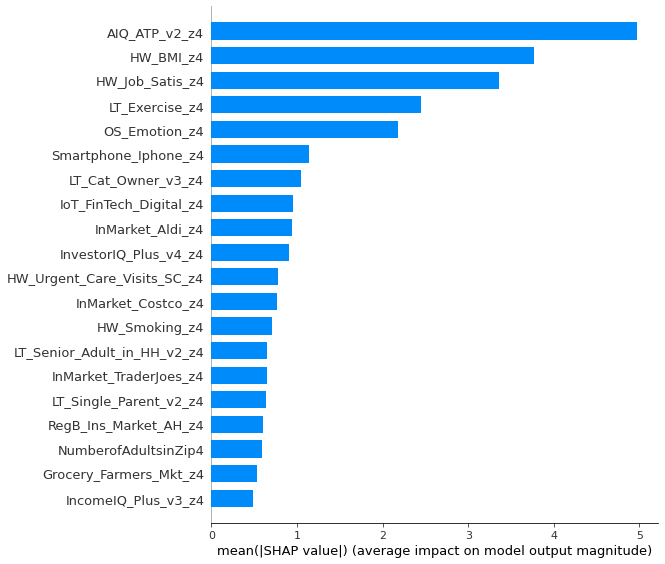

In [121]:
shap.summary_plot(shap_values_aa, X_test_aa, plot_type="bar")

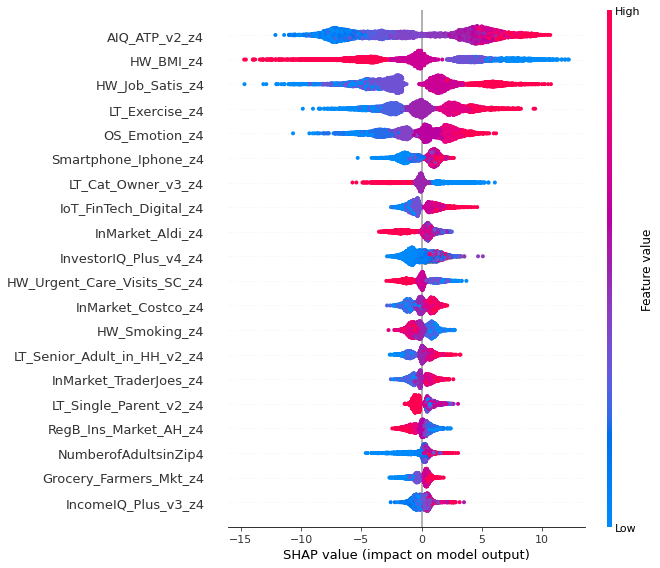

In [122]:
shap.summary_plot(shap_values_aa, X_test_aa)

### Prediction Excluding AA Population 

In [124]:
shod_temp_others_df = shod_filtered_df[shod_filtered_df["EthnicIQ_v2_z4"] != 'AA'].copy()

In [125]:

categorical_columns = ["Carrier_Route_Type_z4", "DwellingType_z4", "Marriage_Code_z4", "EthnicIQ_v2_z4"]

for column in categorical_columns:
    tempdf = pd.get_dummies(shod_temp_others_df[column], prefix=column)
    shod_temp_others_df = pd.merge(
        left=shod_temp_others_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    shod_temp_others_df = shod_temp_others_df.drop(columns=column)



In [126]:
shod_final_others_df = shod_temp_others_df.drop(["zip5", "zip4", "county", "city", "Zip_Carrier_Route","Gender_Code_z4"], axis=1)

In [127]:
X_others = shod_final_others_df.drop([ "SCR_Wellness_z4"],axis=1)
y_others = shod_final_others_df["SCR_Wellness_z4"]

In [128]:
X_train_others, X_test_others, y_train_others, y_test_others = train_test_split(X_others, y_others, test_size=0.25, random_state=12)


In [129]:
xgb_others = XGBRegressor(n_estimators=100)
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
xgb_others.fit(X_train_others, y_train_others)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [130]:
explainer_others = shap.TreeExplainer(xgb_others)
shap_values_others = explainer_others.shap_values(X_test_others)

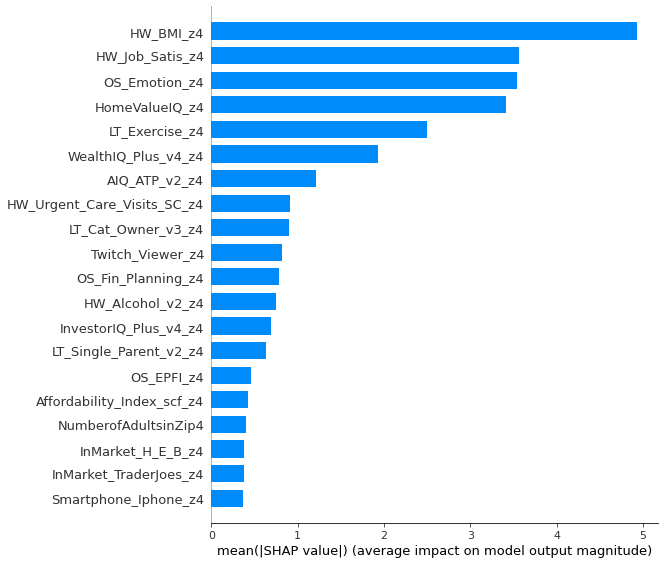

In [131]:
shap.summary_plot(shap_values_others, X_test_others, plot_type="bar",max_display = 20)

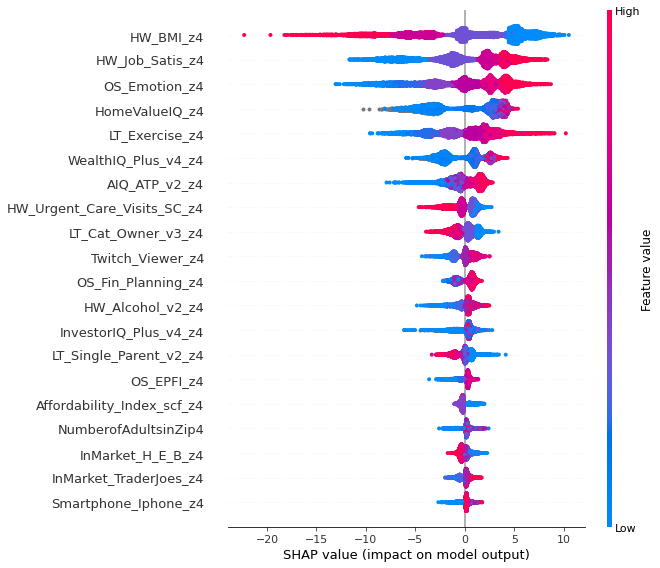

In [132]:
shap.summary_plot(shap_values_others, X_test_others)

In [40]:
shod_df.EthnicIQ_v2_z4.unique()

array(['AA', 'Caucasian-Other', 'Unknown', 'Caucasian-Jewish',
       'Asian-Other', 'Middle Eastern', 'Asian-Chinese', 'Hispanic',
       'Asian-Indian', 'Native Amer/Pac Island', 'Other', nan],
      dtype=object)